# NLM data exploration
by Laura Bartlett and In Hye Cho

_**Introduction**_

The National Library of Medicine (NLM) produces a resource named HealthReach (http://healthreach.nlm.nih.gov) that provides access to free low literacy, mulitlingual health information to be used by healthcare providers with patients/clients. NLM collects the materials and indexes with controlled vocabulary.

Users can access the HealthReach collection through the website but our interest is to make our collection only available through an application programming interface (API). We curently have a closed API that we share with another NLM resource, and a hospital in Kenya that is pulling English, French, and Swahili materials into their patient electronic health records (EHR). The HealthReach program manager wants everyone to be able to pull the exact materials they want (determined by metadata) and use as they need it, when they need it, and where they need it. 

_**Statement of Need**_

The majority of our users are in the healthcare service field and do not feel they are "savvy" in technology. Therefore dicussions of APIs and data often stall conversations about how they can customize the use of the HealthReach data. This is unfortunate as the true strength of the collection would be at point of need in the EHR...not stored in a web database that must be accessed, searched, and retrieved. 

To make our current users more comfortable with thinking about the multilingual collection of HealthReach as "data," we created a visualization of the collection in Tableau https://healthreach.nlm.nih.gov/data-viz. To create the visualizations in Tableau the progammer and program manager have to put in siginificant effort into accurately determining, combining, and displaying the data. The data is extracted directly from the database and users are provided .csv files of the data under an "accessibility" section. The program manager is responsible for checking the Tableau displays to ensure the "numbers" are correct. This is not inconsequential - not only does the program manager not want to do this, but the data that is displayed cannot easily be checked from the .csv because some "massaging" of the data has been done, and the data changes over time. For all of its transparency faults and diffculty in creating, Tableau provides an interactive and approachable interface for low-data literacy consumers.

To best serve the ~~lazy~~ program manager, we will use Python to automate a task she doesn't want to do - check the "numbers" in the visualization. 

_**Demonstration**_

In this presentation we will replicate one visualization on the HealthReach Tableau.

To begin, we pulled data from the HealthReach database and exported to an common-seperated value (.CSV) spreadsheet. We will use this data taken on Novermeber 28, 2018 for our visualization:

https://github.com/BIOF309/final-project-nlm/blob/master/HealthReach_Data_11_28_2018.csv

We can view our the .CSV file, but that is a alot of data for a non-programmer to view. We have over 8,000 rows and 21 columns. We will use **Python for data anyalsis** or **pandas** for short. 

Let us begin by importing **pandas** so we can use it for our visualizations.

In [1]:
#import pandas as pd
import pandas as pd

Next we will bring in our data from our .csv sheet. First we need to download our .csv. 

In [2]:
#download .csv
url = 'https://raw.githubusercontent.com/BIOF309/final-project-nlm/master/HealthReach_Data_11_28_2018.csv'

We need to tell pandas to read our .csv. We will create a dataframe named df1. 

In [3]:
df1 = pd.read_csv(url)

Now our .csv file is loaded and ready to display our .csv data in this Juypter Notebook

In [4]:
df1

,Group ID,Keyword,M+ Health Topic,Title,Resource Properties Page URL,Author,Country of Origin,Medical Reviewer,Other Reviewer,Development Method,...,Community Participation,Copyright,Last Reviewed by Author(s),Record Last Updated,Document ID,Parent Document ID,Language,Material URL,Format,File Type
0,1,Emergency Medical Services; Health services; P...,NaN,"Safe, Smart and Healthy - Keys to Success in Y...",https://healthreach.nlm.nih.gov/document/1/Saf...,Healthy Roads Media,United States,NaN,NaN,Resource developed in English and translated i...,...,NaN,Licensed by Creative Commons,3/2/2016,9/28/2018,1,0,English,https://healthreach.nlm.nih.gov/files/English_...,Document,PDF
1,1,Emergency Medical Services; Health services; P...,NaN,"Safe, Smart and Healthy - Keys to Success in Y...",https://healthreach.nlm.nih.gov/document/1/Saf...,Healthy Roads Media,United States,NaN,NaN,Resource developed in English and translated i...,...,NaN,Licensed by Creative Commons,3/2/2016,9/28/2018,2,1,Amharic,https://healthreach.nlm.nih.gov/files/Amharic_...,Document,PDF
2,1,Emergency Medical Services; Health services; P...,NaN,"Safe, Smart and Healthy - Keys to Success in Y...",https://healthreach.nlm.nih.gov/document/1/Saf...,Healthy Roads Media,United States,NaN,NaN,Resource developed in English and translated i...,...,NaN,Licensed by Creative Commons,3/2/2016,9/28/2018,3,1,Arabic,https://healthreach.nlm.nih.gov/files/Arabic_S...,Document,PDF
3,1,Emergency Medical Services; Health services; P...,NaN,"Safe, Smart and Healthy - Keys to Success in Y...",https://healthreach.nlm.nih.gov/document/1/Saf...,Healthy Roads Media,United States,NaN,NaN,Resource developed in English and translated i...,...,NaN,Licensed by Creative Commons,3/2/2016,9/28/2018,4,1,Dzongkha,https://healthreach.nlm.nih.gov/files/Bhutanes...,Document,PDF
4,1,Emergency Medical Services; Health services; P...,NaN,"Safe, Smart and Healthy - Keys to Success in Y...",https://healthreach.nlm.nih.gov/document/1/Saf...,Healthy Roads Media,United States,NaN,NaN,Resource developed in English and translated i...,...,NaN,Licensed by Creative Commons,3/2/2016,9/28/2018,5,1,Burmese,https://healthreach.nlm.nih.gov/files/Burmese_...,Document,PDF
5,1,Emergency Medical Services; Health services; P...,NaN,"Safe, Smart and Healthy - Keys to Success in Y...",https://healthreach.nlm.nih.gov/document/1/Saf...,Healthy Roads Media,United States,NaN,NaN,Resource developed in English and translated i...,...,NaN,Licensed by Creative Commons,3/2/2016,9/28/2018,6,1,Dari,https://healthreach.nlm.nih.gov/files/Dari_Saf...,Document,PDF
6,1,Emergency Medical Services; Health services; P...,NaN,"Safe, Smart and Healthy - Keys to Success in Y...",https://healthreach.nlm.nih.gov/document/1/Saf...,Healthy Roads Media,United States,NaN,NaN,Resource developed in English and translated i...,...,NaN,Licensed by Creative Commons,3/2/2016,9/28/2018,7,1,Farsi,https://healthreach.nlm.nih.gov/files/Farsi_Sa...,Document,PDF
7,1,Emergency Medical Services; Health services; P...,NaN,"Safe, Smart and Healthy - Keys to Success in Y...",https://healthreach.nlm.nih.gov/document/1/Saf...,Healthy Roads Media,United States,NaN,NaN,Resource developed in English and translated i...,...,NaN,Licensed by Creative Commons,3/2/2016,9/28/2018,8,1,Hakha Chin,https://healthreach.nlm.nih.gov/files/HakhaChi...,Document,PDF
8,1,Emergency Medical Services; Health services; P...,NaN,"Safe, Smart and Healthy - Keys to Success in Y...",https://healthreach.nlm.nih.gov/document/1/Saf...,Healthy Roads Media,United States,NaN,NaN,Resource developed in English and translated i...,...,NaN,Licensed by Creative Commons,3/2/2016,9/28/2018,9,1,Karen,https://healthreach.nlm.nih.gov/files/Karen_Sa...,Document,PDF
9,1,Emergency Medical Services; Health services; P...,NaN,"Safe, Smart and Healthy - Keys to Success in Y...",https://healthreach.nlm.nih.gov/document/1/Saf...,Healthy Roads Media,United States,NaN,NaN,Resource developed in English and translated i...,...,N

Now that we have our data loaded, let's answer a question!

*How many items are in each "Format" in HealthReach?*
This question can be answered with one column of data. We have a metadata field "Format" which has 3 options:
- Document
- Audio
- Video

To answer this question we need to see what rows assigned the controlled vocabulary term (docuemnt, audio, or video) in the metadata column "Format," and display our results showing the 3 options. 

For this I am choosing to display in a pie chart. Let's begin by calculating the number of rows associated with the vocabulary assigned:

In [5]:
import numpy as np

In [6]:
#Code borrowed from "basic pieplot with pandas" by Python graph gallery
#import matplotlib
#import matplotlib as plt

In [7]:
import matplotlib.pyplot as plt

In [8]:
%matplotlib inline

In [9]:
#download .csv
url = 'https://raw.githubusercontent.com/BIOF309/final-project-nlm/master/HealthReach_Data_11_28_2018.csv'

In [10]:
df=pd.read_csv(url)
df

,Group ID,Keyword,M+ Health Topic,Title,Resource Properties Page URL,Author,Country of Origin,Medical Reviewer,Other Reviewer,Development Method,...,Community Participation,Copyright,Last Reviewed by Author(s),Record Last Updated,Document ID,Parent Document ID,Language,Material URL,Format,File Type
0,1,Emergency Medical Services; Health services; P...,NaN,"Safe, Smart and Healthy - Keys to Success in Y...",https://healthreach.nlm.nih.gov/document/1/Saf...,Healthy Roads Media,United States,NaN,NaN,Resource developed in English and translated i...,...,NaN,Licensed by Creative Commons,3/2/2016,9/28/2018,1,0,English,https://healthreach.nlm.nih.gov/files/English_...,Document,PDF
1,1,Emergency Medical Services; Health services; P...,NaN,"Safe, Smart and Healthy - Keys to Success in Y...",https://healthreach.nlm.nih.gov/document/1/Saf...,Healthy Roads Media,United States,NaN,NaN,Resource developed in English and translated i...,...,NaN,Licensed by Creative Commons,3/2/2016,9/28/2018,2,1,Amharic,https://healthreach.nlm.nih.gov/files/Amharic_...,Document,PDF
2,1,Emergency Medical Services; Health services; P...,NaN,"Safe, Smart and Healthy - Keys to Success in Y...",https://healthreach.nlm.nih.gov/document/1/Saf...,Healthy Roads Media,United States,NaN,NaN,Resource developed in English and translated i...,...,NaN,Licensed by Creative Commons,3/2/2016,9/28/2018,3,1,Arabic,https://healthreach.nlm.nih.gov/files/Arabic_S...,Document,PDF
3,1,Emergency Medical Services; Health services; P...,NaN,"Safe, Smart and Healthy - Keys to Success in Y...",https://healthreach.nlm.nih.gov/document/1/Saf...,Healthy Roads Media,United States,NaN,NaN,Resource developed in English and translated i...,...,NaN,Licensed by Creative Commons,3/2/2016,9/28/2018,4,1,Dzongkha,https://healthreach.nlm.nih.gov/files/Bhutanes...,Document,PDF
4,1,Emergency Medical Services; Health services; P...,NaN,"Safe, Smart and Healthy - Keys to Success in Y...",https://healthreach.nlm.nih.gov/document/1/Saf...,Healthy Roads Media,United States,NaN,NaN,Resource developed in English and translated i...,...,NaN,Licensed by Creative Commons,3/2/2016,9/28/2018,5,1,Burmese,https://healthreach.nlm.nih.gov/files/Burmese_...,Document,PDF
5,1,Emergency Medical Services; Health services; P...,NaN,"Safe, Smart and Healthy - Keys to Success in Y...",https://healthreach.nlm.nih.gov/document/1/Saf...,Healthy Roads Media,United States,NaN,NaN,Resource developed in English and translated i...,...,NaN,Licensed by Creative Commons,3/2/2016,9/28/2018,6,1,Dari,https://healthreach.nlm.nih.gov/files/Dari_Saf...,Document,PDF
6,1,Emergency Medical Services; Health services; P...,NaN,"Safe, Smart and Healthy - Keys to Success in Y...",https://healthreach.nlm.nih.gov/document/1/Saf...,Healthy Roads Media,United States,NaN,NaN,Resource developed in English and translated i...,...,NaN,Licensed by Creative Commons,3/2/2016,9/28/2018,7,1,Farsi,https://healthreach.nlm.nih.gov/files/Farsi_Sa...,Document,PDF
7,1,Emergency Medical Services; Health services; P...,NaN,"Safe, Smart and Healthy - Keys to Success in Y...",https://healthreach.nlm.nih.gov/document/1/Saf...,Healthy Roads Media,United States,NaN,NaN,Resource developed in English and translated i...,...,NaN,Licensed by Creative Commons,3/2/2016,9/28/2018,8,1,Hakha Chin,https://healthreach.nlm.nih.gov/files/HakhaChi...,Document,PDF
8,1,Emergency Medical Services; Health services; P...,NaN,"Safe, Smart and Healthy - Keys to Success in Y...",https://healthreach.nlm.nih.gov/document/1/Saf...,Healthy Roads Media,United States,NaN,NaN,Resource developed in English and translated i...,...,NaN,Licensed by Creative Commons,3/2/2016,9/28/2018,9,1,Karen,https://healthreach.nlm.nih.gov/files/Karen_Sa...,Document,PDF
9,1,Emergency Medical Services; Health services; P...,NaN,"Safe, Smart and Healthy - Keys to Success in Y...",https://healthreach.nlm.nih.gov/document/1/Saf...,Healthy Roads Media,United States,NaN,NaN,Resource developed in English and translated i...,...,N

In [11]:
#Determine the count of rows for each option in Format column
df2 = df1.set_index(['Format'])

df_video_size = len(df2.loc['Video'])
df_doc_size = len(df2.loc['Document'])
df_audio_size = len(df2.loc['Audio'])


print('doc: {}'.format(df_doc_size))

print('video: {}'.format(df_video_size))

print('audio: {}'.format(df_video_size)) 


doc: 6533
video: 1143
audio: 1143


In [12]:
#1.	here is an example of picking a subset of data
#df[df.Format=='Audio'][df.Language=='English']
#please notice the == 
#2.	To get the count for each format:


#AudioCount = len(df[df.Format=='Audio'])
#VideoCount = len(df[df.Format=='Video'])
#DocCount = len(df[df.Format=='Document'])
#print(AudioCount)
#print(VideoCount)
#print(DocCount)


In [13]:
#Check to make sure numbers are accurate
print (6533+1143+1143)

8819


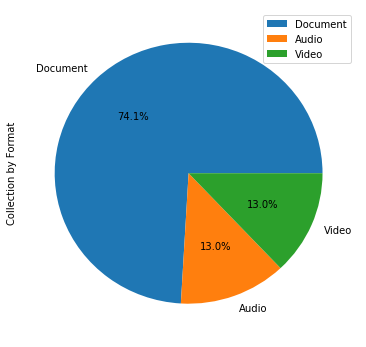

In [14]:
#create pie chart
#Code borrowed from "basic pieplot with pandas" by Python graph gallery
# --- dataset 1: just 3 values for 3 groups: 


df = pd.DataFrame([6533,1143,1143], index=['Document', 'Audio', 'Video'], columns=['Collection by Format']) 

# make the plot 
df.plot(kind='pie', autopct='%.1f%%', subplots=True, figsize=(6, 6));



Try to replicate the word cloud.....

In [20]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
conda install -c conda-forge/label/gcc7 wordcloud
conda install -c conda-forge wordcloud
from subprocess import check_output

import matplotlib.pyplot as plt
% matplotlib inline



#mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


stopwords = set(STOPWORDS)
data = pd.read_csv("https://raw.githubusercontent.com/BIOF309/final-project-nlm/master/HealthReach_Data_11_28_2018.csv")

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(data['title']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)


SyntaxError: invalid syntax (<ipython-input-20-637230171341>, line 6)